Author: Batıhan AKÇA
ID: 21502824

GE-461 DataStream Assignment

In [1]:
import numpy as np
%matplotlib notebook

from skmultiflow.data.random_rbf_generator import RandomRBFGenerator
from skmultiflow.data.random_rbf_generator_drift import RandomRBFGeneratorDrift

from skmultiflow.trees import HoeffdingTree
from skmultiflow.bayes import NaiveBayes
from sklearn.neural_network import MLPClassifier

from skmultiflow.evaluation import EvaluatePrequential
from sklearn.metrics import accuracy_score

In [2]:
# Preparing Datastreams with a fixed random_seed
rbf = RandomRBFGenerator(model_random_state = 0, sample_random_state = 0, n_classes = 2, n_features = 10)
rbf10 = RandomRBFGeneratorDrift(model_random_state = 0, sample_random_state = 0, n_classes = 2, n_features = 10, change_speed = 10)
rbf70 = RandomRBFGeneratorDrift(n_classes = 2, n_features = 10, change_speed = 70)

rbf.prepare_for_use()
rbf10.prepare_for_use()
rbf70.prepare_for_use()

# Generating the first 10000 samples
d = rbf.next_sample(10000)
d10 = rbf10.next_sample(10000)
d70 = rbf70.next_sample(10000)

# Data manupilation for writing them in intended format
file1 = np.append(d[0], d[1].reshape(10000,1) , axis = 1)
file2 = np.append(d10[0], d10[1].reshape(10000,1) , axis = 1)
file3 = np.append(d70[0], d70[1].reshape(10000,1) , axis = 1)

# Saving the generated datasets.
np.savetxt('RBF Dataset.txt', file1, delimiter=',')
np.savetxt('RBF Dataset 10.txt', file2, delimiter=',')
np.savetxt('RBF Dataset 70.txt', file3, delimiter=',')

In [3]:
# Defining HT, NB and MLP classifiers
ht = HoeffdingTree()
nb = NaiveBayes()
mlp = MLPClassifier(hidden_layer_sizes = (200,4), max_iter = 600)

# Defining For Datastream Comparison with 10000 max_samples as given in the assignment question.
evaluate = EvaluatePrequential(max_samples = 10000, show_plot = True, metrics=['accuracy'])

<IPython.core.display.Javascript object>


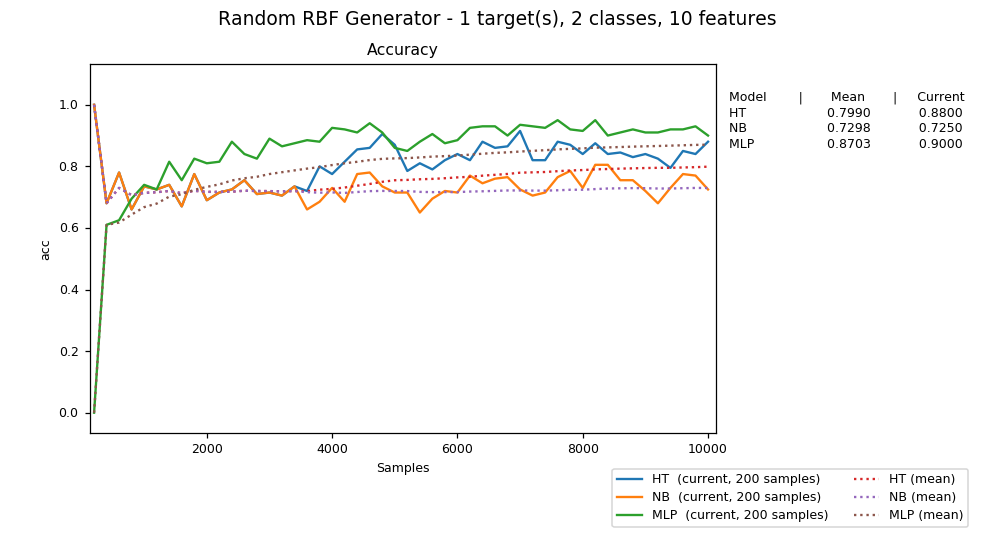

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [61.65s]
Processed samples: 10000
Mean performance:
HT - Accuracy     : 0.7990
NB - Accuracy     : 0.7298
MLP - Accuracy     : 0.8703


[HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
               max_byte_size=33554432, memory_estimate_period=1000000,
               nb_threshold=0, no_preprune=False, nominal_attributes=None,
               remove_poor_atts=False, split_confidence=1e-07,
               split_criterion='info_gain', stop_mem_management=False,
               tie_threshold=0.05),
 NaiveBayes(nominal_attributes=None),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(200, 4), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=600,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=None, shuffle=True, solver='adam',
               tol=0.0001, validation_fraction=0.1, verbose=False,
               warm_start=False)]

In [4]:
# Online Classification for the RBF dataset
evaluate.evaluate(stream = rbf, model = [ht, nb, mlp], model_names = ['HT', 'NB', 'MLP'])

<IPython.core.display.Javascript object>


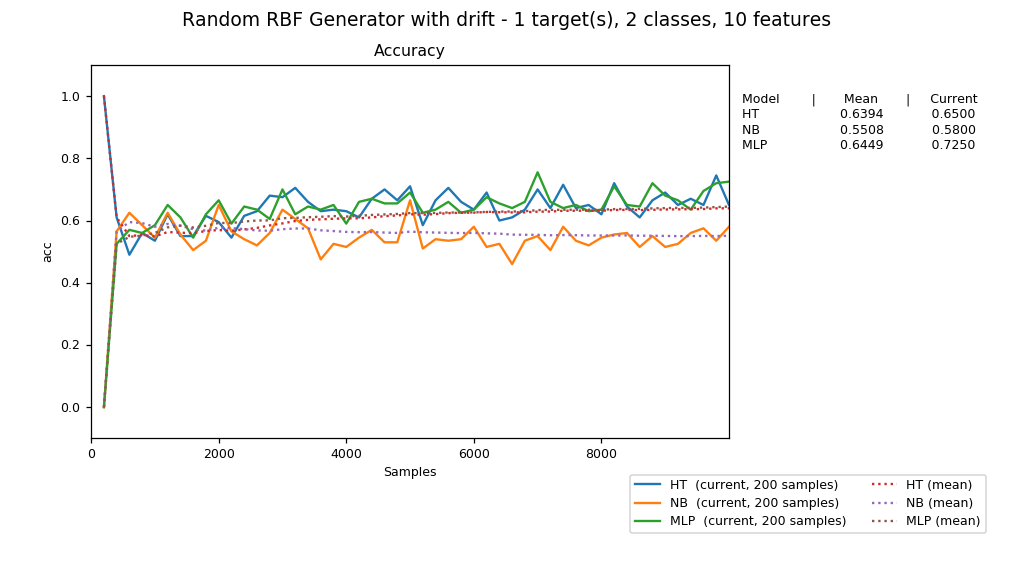

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [96.45s]
Processed samples: 10000
Mean performance:
HT - Accuracy     : 0.6394
NB - Accuracy     : 0.5508
MLP - Accuracy     : 0.6449


[HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
               max_byte_size=33554432, memory_estimate_period=1000000,
               nb_threshold=0, no_preprune=False, nominal_attributes=None,
               remove_poor_atts=False, split_confidence=1e-07,
               split_criterion='info_gain', stop_mem_management=False,
               tie_threshold=0.05),
 NaiveBayes(nominal_attributes=None),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(200, 4), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=600,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=None, shuffle=True, solver='adam',
               tol=0.0001, validation_fraction=0.1, verbose=False,
               warm_start=False)]

In [5]:
# Online Classification for the RBF10 dataset
evaluate.evaluate(stream = rbf10, model = [ht, nb, mlp], model_names = ['HT', 'NB', 'MLP'])

<IPython.core.display.Javascript object>


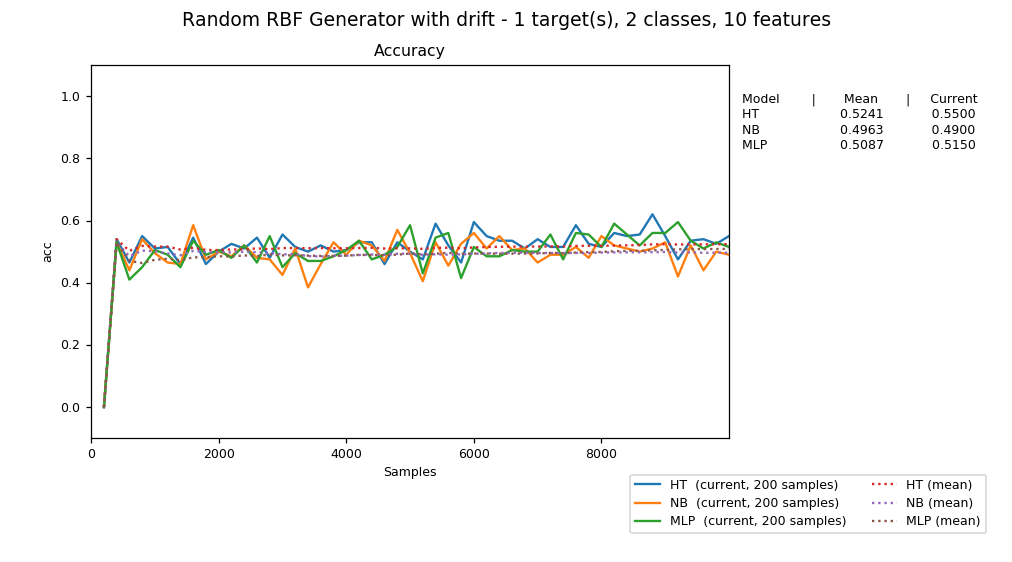

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [98.38s]
Processed samples: 10000
Mean performance:
HT - Accuracy     : 0.5241
NB - Accuracy     : 0.4963
MLP - Accuracy     : 0.5087


[HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
               max_byte_size=33554432, memory_estimate_period=1000000,
               nb_threshold=0, no_preprune=False, nominal_attributes=None,
               remove_poor_atts=False, split_confidence=1e-07,
               split_criterion='info_gain', stop_mem_management=False,
               tie_threshold=0.05),
 NaiveBayes(nominal_attributes=None),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(200, 4), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=600,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=None, shuffle=True, solver='adam',
               tol=0.0001, validation_fraction=0.1, verbose=False,
               warm_start=False)]

In [6]:
# Online Classification for the RBF70 dataset
evaluate.evaluate(stream = rbf70, model = [ht, nb, mlp], model_names = ['HT', 'NB', 'MLP'])

In [7]:
# Importing for ensemble methods
from sklearn.ensemble import VotingClassifier

In [8]:
# Defining the Ensemble methods.
ensble_maj = VotingClassifier(estimators = [('HT', ht),('NB', nb),('MLP', mlp)], voting = 'hard',weights = [1,1,1])
# /weights = None/ assigns weights from a uniform distribution
ensble_weigh = VotingClassifier(estimators = [('HT', ht),('NB', nb),('MLP', mlp)], weights = None) 

In [14]:
# Printing Accuracy scores for majority approach

ensble_maj.fit(d[0],d[1])
print("Accuracy Score for MV Data1: " + str(accuracy_score(d[1], ensble_maj.predict(d[0]))))
ensble_maj.fit(d10[0],d10[1])
print("Accuracy Score for MV Data2: " + str(accuracy_score(d10[1], ensble_maj.predict(d10[0]))))
ensble_maj.fit(d70[0],d70[1])
print("Accuracy Score for MV Data3: " + str(accuracy_score(d70[1], ensble_maj.predict(d70[0]))))

Accuracy Score for MV Data1: 0.8884
Accuracy Score for MV Data2: 0.6177
Accuracy Score for MV Data3: 0.5932


In [15]:
# Printing Accuracy scores for weighted approach

ensble_weigh.fit(d[0],d[1])
print("Accuracy Score for WMV Data1: " + str(accuracy_score(d[1], ensble_weigh.predict(d[0]))))
ensble_weigh.fit(d10[0],d10[1])
print("Accuracy Score for WMV Data2: " + str(accuracy_score(d10[1], ensble_weigh.predict(d10[0]))))
ensble_weigh.fit(d70[0],d70[1])
print("Accuracy Score for WMV Data3: " + str(accuracy_score(d10[1], ensble_weigh.predict(d70[0]))))

Accuracy Score for VMV Data1: 0.8913
Accuracy Score for VMV Data2: 0.6146
Accuracy Score for VMV Data3: 0.478


In [16]:
# Splitting datasets into test and train data with a 0.2 ratio
# Fixed random_state for having the same distribution every run
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(d[0], d[1], test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(d10[0], d10[1], test_size = 0.2, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(d70[0], d70[1], test_size = 0.2, random_state = 0)

In [11]:
# Fitting batch methods for RBF Dataset
ht.fit(X_train1, y_train1)
nb.fit(X_train1, y_train1)
mlp.fit(X_train1, y_train1)

print("Accuracy Score for HT Data1: " + str(accuracy_score(y_test1, ht.predict(X_test1))))
print("Accuracy Score for NB Data1: " + str(accuracy_score(y_test1, nb.predict(X_test1))))
print("Accuracy Score for MLP Data1: " + str(accuracy_score(y_test1, mlp.predict(X_test1))))

Accuracy Score for HT Data1: 0.849
Accuracy Score for NB Data1: 0.706
Accuracy Score for MLP Data1: 0.949


In [12]:
# Fitting batch methods for RBF10 Dataset
ht.fit(X_train2, y_train2)
nb.fit(X_train2, y_train2)
mlp.fit(X_train2, y_train2)

print("Accuracy Score for HT Data2: " + str(accuracy_score(y_test2, ht.predict(X_test2))))
print("Accuracy Score for NB Data2: " + str(accuracy_score(y_test2, nb.predict(X_test2))))
print("Accuracy Score for MLP Data2 " + str(accuracy_score(y_test2, mlp.predict(X_test2))))

Accuracy Score for HT Data2: 0.65
Accuracy Score for NB Data2: 0.5185
Accuracy Score for MLP Data2 0.765


In [13]:
# Fitting batch methods for RBF70 Dataset
ht.fit(X_train3, y_train3)
nb.fit(X_train3, y_train3)
mlp.fit(X_train3, y_train3)

print("Accuracy Score for HT Data3: " + str(accuracy_score(y_test3, ht.predict(X_test3))))
print("Accuracy Score for NB Data3: " + str(accuracy_score(y_test3, nb.predict(X_test3))))
print("Accuracy Score for MLP Data3: " + str(accuracy_score(y_test3, mlp.predict(X_test3))))

Accuracy Score for HT Data3: 0.542
Accuracy Score for NB Data3: 0.5105
Accuracy Score for MLP Data3: 0.5435


In [17]:
# Defining Ensemble methods for batch classifiers
ensble_maj = VotingClassifier(estimators = [('HT', ht),('NB', nb),('MLP', mlp)], voting = 'hard',weights = [1,1,1])
ensble_weigh = VotingClassifier(estimators = [('HT', ht),('NB', nb),('MLP', mlp)], weights = None) # weights = None assigns weights from a uniform distribution

In [18]:
# Printing accuracy scores of Majority Approach

ensble_maj.fit(X_train1,y_train1)
print("Accuracy Score for MV Data1: " + str(accuracy_score(y_test1, ensble_maj.predict(X_test1))))
ensble_maj.fit(X_train2,y_train2)
print("Accuracy Score for MV Data2: " + str(accuracy_score(y_test2, ensble_maj.predict(X_test2))))
ensble_maj.fit(X_train3,y_train3)
print("Accuracy Score for MV Data3: " + str(accuracy_score(y_test3, ensble_maj.predict(X_test3))))

Accuracy Score for MV Data1: 0.846
Accuracy Score for MV Data2: 0.549
Accuracy Score for MV Data3: 0.5525


In [19]:
# Printing accuracy scores of Weighted Approach

ensble_weigh.fit(X_train1,y_train1)
print("Accuracy Score for WMV Data1: " + str(accuracy_score(y_test1, ensble_weigh.predict(X_test1))))
ensble_weigh.fit(X_train2,y_train2)
print("Accuracy Score for WMV Data2: " + str(accuracy_score(y_test2, ensble_weigh.predict(X_test2))))
ensble_weigh.fit(X_train3,y_train3)
print("Accuracy Score for WMV Data3: " + str(accuracy_score(y_test3, ensble_weigh.predict(X_test3))))

Accuracy Score for MV Data1: 0.8465
Accuracy Score for MV Data2: 0.547
Accuracy Score for MV Data3: 0.544
